# K-Nearest Neighbours 

K-Nearest Neighbors (KNN) is a simple and powerful supervised learning algorithm used for classification and regression. It works by finding the `K` nearest data points (neighbors) to a given input and predicting the class based on a majority vote (for classification) or averaging (for regression).

### **Steps of KNN Algorithm**
1. Choose the number of neighbors `K`.
2. Compute the distance (e.g., Euclidean) between the input sample and all training samples.
3. Select the `K` nearest neighbors.
4. Assign the most frequent class among those neighbors to the test point.
   
## Step 1: Load the Dataset and Preprocess
We first load the Titanic dataset and inspect its structure. Then We apply preprocessing like what we had done in Logistic Regression for Titanic dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "../Datasets/Titanic_dataset_train.csv"
df = pd.read_csv(file_path)

# Fill missing Age with median
df["Age"].fillna(df["Age"].median(), inplace=True)

# Fill missing Embarked with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Drop Cabin column (too many missing values)
df.drop(columns=["Cabin"], inplace=True)

# Convert 'Sex' column to numeric
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

# One-hot encode 'Embarked' column
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1


## Step 2: Splitting the Dataset
Split features and label columns and then split samples for Train and Test sets.

In [2]:
from sklearn.model_selection import train_test_split

# Select features and target variable
features = ["Pclass", "Sex", "Age", "Fare", "Embarked_Q", "Embarked_S"]
X = df[features]
y = df["Survived"]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((712, 6), (179, 6))

## Step 3: Train the KNN

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize KNN classifier with k=5 (default choice, can be tuned)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7039
Confusion Matrix:
[[89 16]
 [37 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.85      0.77       105
           1       0.70      0.50      0.58        74

    accuracy                           0.70       179
   macro avg       0.70      0.67      0.68       179
weighted avg       0.70      0.70      0.69       179



## Understanding Key Parameters in KNN

KNN has several hyperparameters that impact model performance:

### 1. `n_neighbors (K)` - Number of neighbors to consider.
   - A small `K` (e.g., 1 or 3) can lead to **high variance (overfitting)**.
   - A large `K` (e.g., 15 or 20) smooths the decision boundary, reducing variance but increasing bias.
   - **Example**: 
     - If `K=1`, the model memorizes the training data and is highly sensitive to noise.
     - If `K=20`, predictions are influenced by many distant points, leading to a smoother decision boundary.

### 2. `metric` - Distance metric to measure similarity between points.
   - Common choices:
     - **"euclidean"**: Standard Euclidean distance.
     - **"manhattan"**: Sum of absolute differences.
     - **"minkowski"**: Generalization; `p=1` (Manhattan), `p=2` (Euclidean).
   - **Example**: 
     - If points are spread diagonally, Manhattan distance might perform better.
     - For standard Euclidean space, Euclidean distance is a good default choice.
  
![alt text](<distances.png>)

### 3. `weights` - How neighbors contribute to the classification.
   - `"uniform"`: All neighbors are weighted equally.
   - `"distance"`: Closer neighbors have a greater influence.
   - **Example**:
     - If `"uniform"`, all nearest neighbors contribute equally.
     - If `"distance"`, points closer to the query sample will have more impact.

### 6. `p` - Determines the Minkowski distance metric.
   - `p=1` → Manhattan Distance.
   - `p=2` → Euclidean Distance.
   - **Example**:
     - If `p=1`, the model follows city-block distance.
     - If `p=2`, the model follows straight-line (Euclidean) distance.

## Fine-tuning KNN for Best Performance

### **1. Choosing the Best `K` Value**
We can determine the optimal `K` using cross-validation.

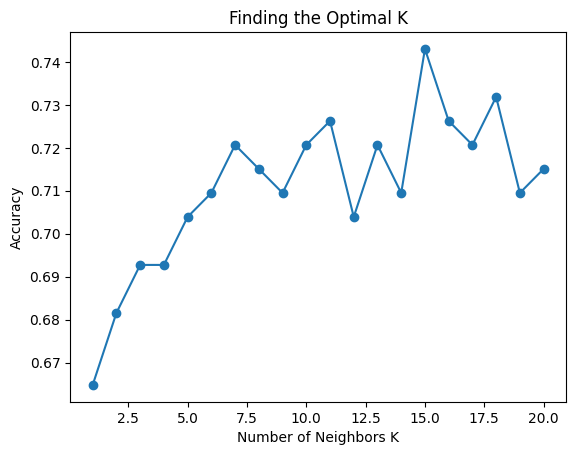

In [7]:
accuracy_scores = []

k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('Finding the Optimal K')
plt.show()

## Testing Different Distance Metrics
Let's see how different distance metrics affect the model.

In [8]:
metrics = ["euclidean", "manhattan", "minkowski"]
for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"Metric: {metric}, Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Metric: euclidean, Accuracy: 0.7039
Metric: manhattan, Accuracy: 0.7374
Metric: minkowski, Accuracy: 0.7039


In [9]:
for weight in ["uniform", "distance"]:
    knn = KNeighborsClassifier(n_neighbors=5, weights=weight)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"Weight: {weight}, Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Weight: uniform, Accuracy: 0.7039
Weight: distance, Accuracy: 0.6983


KNN Accuracy: 0.7039
Logistic Regression Accuracy: 0.7989
Naive Bayes Accuracy: 0.7654


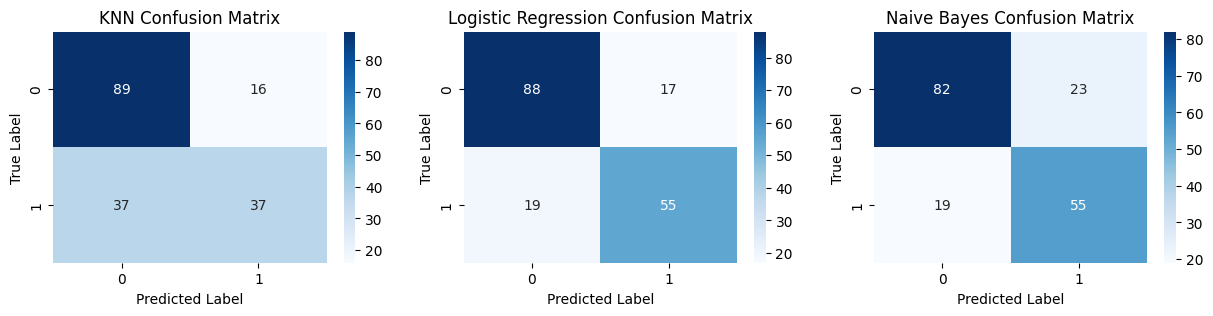

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize classifiers
knn = KNeighborsClassifier(n_neighbors=5)
log_reg = LogisticRegression(max_iter=1000)
nb = GaussianNB()

# Train models
knn.fit(X_train, y_train)
log_reg.fit(X_train, y_train)
nb.fit(X_train, y_train)

# Predict on test set
y_pred_knn = knn.predict(X_test)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_nb = nb.predict(X_test)

# Evaluate models
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Print accuracy results
print(f"KNN Accuracy: {accuracy_knn:.4f}")
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")
print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")

# Confusion matrices
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
models = ["KNN", "Logistic Regression", "Naive Bayes"]
conf_matrices = [conf_matrix_knn, conf_matrix_log_reg, conf_matrix_nb]

for ax, model, conf_matrix in zip(axes, models, conf_matrices):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{model} Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

plt.show()

In [12]:
df = pd.read_csv('../Datasets/student_performance_clean.csv')
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
y = df['Performance Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (7968, 5)
Testing set size: (1993, 5)


KNN Regression MSE: 13.1360, R² Score: 0.9645
Linear Regression MSE: 9.6157, R² Score: 0.9740


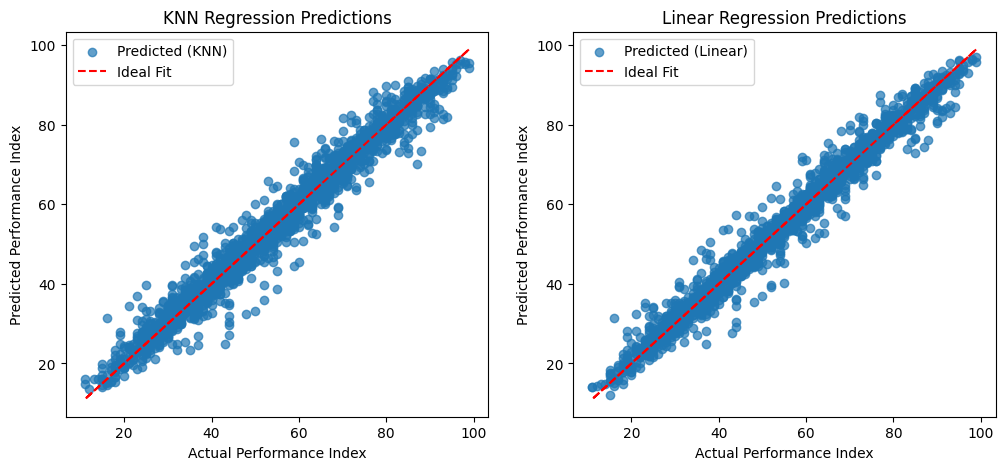

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)

# Train Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Evaluate models
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

# Print results
print(f"KNN Regression MSE: {mse_knn:.4f}, R² Score: {r2_knn:.4f}")
print(f"Linear Regression MSE: {mse_lin:.4f}, R² Score: {r2_lin:.4f}")

# Plot predictions vs actual values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_knn, alpha=0.7, label='Predicted (KNN)')
plt.plot(y_test, y_test, color='red', linestyle='dashed', label='Ideal Fit')
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("KNN Regression Predictions")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lin, alpha=0.7, label='Predicted (Linear)')
plt.plot(y_test, y_test, color='red', linestyle='dashed', label='Ideal Fit')
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Linear Regression Predictions")
plt.legend()

plt.show()